In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df_GK = pd.read_csv(r"C:\Users\foooo\Datascincecamp\Usecase-7\df_GK.csv")

In [3]:
# I want get nathonalty

In [4]:
df_GK.shape

(1158, 22)

In [5]:
df_GK.head(2)

,Unnamed: 0,player,team,name,position,height,age,appearance,goals,assists,...,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,...,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,...,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1


In [6]:
df_GK.columns

Index(['Unnamed: 0', 'player', 'team', 'name', 'position', 'height', 'age',
       'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
       'red cards', 'goals conceded', 'clean sheets', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_encoded'],
      dtype='object')

In [7]:
df_GK.drop('Unnamed: 0',axis=1, inplace= True)

In [8]:
df_GK.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
dtype: object

In [9]:
df_GK_copy = df_GK.copy()

In [10]:
df_GK_copy['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [11]:
len(df_GK_copy['team'].unique())

374

In [12]:


# الدوري الإنجليزي الممتاز (Premier League)
premier_league = [
    'Manchester United', 'West Ham United', 'Leicester City',
    'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
    'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest',
    'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
    'Brentford FC', 'Liverpool FC', 'Newcastle United', 'Manchester City',
    'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC'
]

# الدوري الألماني (Bundesliga)
bundesliga = [
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
    '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05',
    '1.FC Köln', 'Hertha BSC', 'FC Schalke 04', 'VfL Bochum', 'SV Werder Bremen',
    'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
    'Bayern Munich', 'RB Leipzig'
]

# الدوري الإسباني (La Liga)
la_liga = [
    'Real Sociedad', 'Villarreal CF', 'Real Betis Balompié', 'Athletic Bilbao',
    'Valencia CF', 'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
    'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF',
    'Atlético de Madrid', 'Real Madrid', 'FC Barcelona'
]

# الدوري الإيطالي (Serie A)
serie_a = [
    'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC',
    'Udinese Calcio', 'Bologna FC 1909', 'AC Monza', 'FC Empoli',
    'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli',
    'Inter Milan', 'AC Milan', 'Juventus FC'
]

# الدوري الفرنسي (Ligue 1)
ligue_1 = [
    'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice',
    'RC Lens', 'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse',
    'ESTAC Troyes', 'Stade Brestois 29', 'Angers SCO', 'AJ Auxerre',
    'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain'
]

# الدوري الهولندي (Eredivisie)
eredivisie = [
    'AZ Alkmaar', 'Twente Enschede FC', 'Vitesse Arnhem', 'FC Groningen',
    'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam',
    'RKC Waalwijk', 'FC Emmen', 'Go Ahead Eagles', 'FC Utrecht',
    'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven', 'Feyenoord Rotterdam'
]

# الدوري البرازيلي (Brasileirão)
brasileirao = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club',
    'Sport Club Internacional', 'Esporte Clube Bahia',
    'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas',
    'Clube Atlético Mineiro', 'São Paulo Futebol Clube',
    'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista'
]

# الدوري البرتغالي (Primeira Liga)
primeira_liga = [
    'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo',
    'Casa Pia AC', 'FC Paços de Ferreira', 'FC Arouca', 'FC Vizela',
    'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica'
]

# الدوري المكسيكي (Liga MX)
liga_mx = [
    'Santos Laguna', 'Club León FC', 'FC Juárez', 'Club Tijuana',
    'Atlético de San Luis', 'Club Necaxa', 'Puebla FC', 'Mazatlán FC',
    'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara',
    'CD Cruz Azul', 'CF Pachuca'
]

# الدوري الروسي (Russian Premier League)
russian_premier_league = [
    'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara',
    'FC Sochi', 'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg',
    'FC Pari Nizhniy Novgorod', 'FK Khimki', 'Torpedo Moscow', 'Fakel Voronezh',
    'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg'
]

# الدوري الإنجليزي الدرجة الأولى (Championship)
championship = [
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End',
    'Stoke City', 'Queens Park Rangers', 'Birmingham City', 'Cardiff City',
    'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic',
    'Middlesbrough FC', 'Coventry City', 'Luton Town', 'Swansea City',
    'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers',
    'Norwich City'
]

# الدوري التركي (Süper Lig)
super_lig = [
    'Trabzonspor', 'Besiktas JK', 'Basaksehir FK', 'Antalyaspor',
    'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor',
    'Istanbulspor', 'Hatayspor', 'Gaziantep FK', 'Fatih Karagümrük',
    'Ümraniyespor', 'Fenerbahce', 'Galatasaray'
]

# الدوري النمساوي (Austrian Bundesliga)
austrian_bundesliga = [
    'SK Sturm Graz', 'LASK', 'SCR Altach', 'SC Austria Lustenau', 'SV Ried',
    'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]

# الدوري الأمريكي (Major League Soccer - MLS)
mls = [
    'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United',
    'New York Red Bulls', 'Portland Timbers', 'Columbus Crew', 'Charlotte FC',
    'Sporting Kansas City', 'Colorado Rapids', 'Vancouver Whitecaps FC',
    'Chicago Fire FC', 'Inter Miami CF', 'Minnesota United FC',
    'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal', 'Real Salt Lake City',
    'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC',
    'Toronto FC'
]

# الدوري الأرجنتيني (Argentine Primera División)
argentine_primera = [
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús',
    'Defensa y Justicia', 'Club Estudiantes de La Plata', "CA Newell's Old Boys",
    'CA Colon', 'CA Rosario Central', 'CA Banfield',
    'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión',
    'Club Atlético Platense', 'Instituto AC Córdoba', 'CA Sarmiento (Junin)',
    'CA Central Córdoba (SdE)', 'CA Barracas Central', 'Arsenal Fútbol Club',
    'Club Atlético Talleres', 'Club Atlético Belgrano', 'AA Argentinos Juniors',
    'CA Independiente', 'Club Atlético Tigre', 'CA River Plate', 'CA Boca Juniors',
    'CA Huracán', 'Racing Club'
]

# الدوري الياباني (J1 League)
j1_league = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga',
    'FC Tokyo', 'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC',
    'Avispa Fukuoka', 'Sagan Tosu', 'Vissel Kobe', 'Hokkaido Consadole Sapporo',
    'Shonan Bellmare', 'Albirex Niigata', 'Kashima Antlers',
    'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka'
]

# الدوري السعودي (Saudi Pro League)
saudi_pro_league = [
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC',
    'Damac FC', 'Al-Tai', 'Al-Fayha FC'
]

k_league_1 = [
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United',
    'Gangwon FC', 'Daejeon Hana Citizen', 'Gwangju FC', 'Daegu FC',
    'Suwon FC', 'Pohang Steelers', 'FC Seoul',
    'Jeonbuk Hyundai Motors', 'Ulsan Hyundai'
]

premier_soccer_league = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows',
    'Stellenbosch FC', 'Swallows FC', 'Maritzburg United FC', 'Royal AM FC',
    'TS Galaxy FC', 'Richards Bay FC', 'Marumo Gallants FC',
    'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]


a_league = [
    'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar',
    'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United',
    'Western Sydney Wanderers'
]



print(len(premier_league) + len(bundesliga) + len(la_liga) + len(serie_a) + len(ligue_1) + len(eredivisie) + len(brasileirao) + 
      len(primeira_liga) + len(liga_mx) + len(russian_premier_league) + len(championship) + len(super_lig) + len(austrian_bundesliga) + 
      len(mls) + len(argentine_primera) + len(j1_league) + len(saudi_pro_league) + len(k_league_1) + len(premier_soccer_league) + 
      len(a_league) )


365


In [13]:
#WE WILL HAVE BEEN NULL BUT WE WILL IMPUTE LATER

In [14]:
#data = {'Club': ['Manchester United', 'Borussia Dortmund', 'Real Madrid', 'AS Roma', 'PSG', 'Santos FC']}
#df = pd.DataFrame(data)

# دالة لتحديد الدوري بناءً على النادي
def get_league(club):
    if club in premier_league:
        return 'Premier League'
    elif club in bundesliga:
        return 'Bundesliga'
    elif club in la_liga:
        return 'La Liga'
    elif club in serie_a:
        return 'Serie A'
    elif club in ligue_1:
        return 'Ligue 1'
    elif club in eredivisie:
        return 'Eredivisie'
    elif club in brasileirao:
        return 'Brasileirão'
    elif club in primeira_liga:
        return 'Primeira Liga'
    elif club in liga_mx:
        return 'Liga MX'
    elif club in russian_premier_league:
        return 'Russian Premier League'
    elif club in championship:
        return 'Championship'
    elif club in super_lig:
        return 'Süper Lig'
    elif club in austrian_bundesliga:
        return 'Austrian Bundesliga'
    elif club in mls:
        return 'MLS'
    elif club in argentine_primera:
        return 'Argentine Primera División'
    elif club in j1_league:
        return 'J1 League'
    elif club in saudi_pro_league:
        return 'Saudi Pro League'
    elif club in k_league_1:
        return 'K League 1'
    elif club in premier_soccer_league:
        return 'Premier Soccer League'
    elif club in a_league:
        return 'A-League'
    else:
        return 'Unknown'

df_GK_copy['League'] = df_GK_copy['team'].apply(get_league)

In [15]:
df_GK_copy[['team','League']].sample(10)

,team,League
501,Puebla FC,Liga MX
997,Al-Khaleej,Unknown
571,FK Krasnodar,Russian Premier League
1062,FC Seoul,K League 1
537,Lokomotiv Moscow,Russian Premier League
954,Kashima Antlers,J1 League
794,Houston Dynamo FC,MLS
948,Shonan Bellmare,J1 League
949,Albirex Niigata,J1 League
340,RKC Waalwijk,Eredivisie


In [16]:
df_GK_copy['team'][df_GK_copy['League'] == 'Unknown'].unique()

array(['Brighton &amp; Hove Albion', 'Abha Club', 'Al-Khaleej',
       'Al-Raed SFC', 'Al-Batin FC', 'Al-Adalah FC',
       'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC',
       'Al-Nassr FC'], dtype=object)

In [17]:
# الدوري الإنجليزي الممتاز (Premier League)
premier_league = [
    'Manchester United', 'West Ham United', 'Leicester City',
    'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
    'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest',
    'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
    'Brentford FC', 'Liverpool FC', 'Newcastle United', 'Manchester City',
    'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC','Brighton &amp; Hove Albion'
]

# الدوري الألماني (Bundesliga)
bundesliga = [
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
    '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05',
    '1.FC Köln', 'Hertha BSC', 'FC Schalke 04', 'VfL Bochum', 'SV Werder Bremen',
    'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
    'Bayern Munich', 'RB Leipzig'
]

# الدوري الإسباني (La Liga)
la_liga = [
    'Real Sociedad', 'Villarreal CF', 'Real Betis Balompié', 'Athletic Bilbao',
    'Valencia CF', 'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
    'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF',
    'Atlético de Madrid', 'Real Madrid', 'FC Barcelona'
]

# الدوري الإيطالي (Serie A)
serie_a = [
    'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC',
    'Udinese Calcio', 'Bologna FC 1909', 'AC Monza', 'FC Empoli',
    'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli',
    'Inter Milan', 'AC Milan', 'Juventus FC'
]

# الدوري الفرنسي (Ligue 1)
ligue_1 = [
    'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice',
    'RC Lens', 'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse',
    'ESTAC Troyes', 'Stade Brestois 29', 'Angers SCO', 'AJ Auxerre',
    'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain'
]

# الدوري الهولندي (Eredivisie)
eredivisie = [
    'AZ Alkmaar', 'Twente Enschede FC', 'Vitesse Arnhem', 'FC Groningen',
    'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam',
    'RKC Waalwijk', 'FC Emmen', 'Go Ahead Eagles', 'FC Utrecht',
    'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven', 'Feyenoord Rotterdam'
]

# الدوري البرازيلي (Brasileirão)
brasileirao = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club',
    'Sport Club Internacional', 'Esporte Clube Bahia',
    'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas',
    'Clube Atlético Mineiro', 'São Paulo Futebol Clube',
    'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista'
]

# الدوري البرتغالي (Primeira Liga)
primeira_liga = [
    'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo',
    'Casa Pia AC', 'FC Paços de Ferreira', 'FC Arouca', 'FC Vizela',
    'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica'
]

# الدوري المكسيكي (Liga MX)
liga_mx = [
    'Santos Laguna', 'Club León FC', 'FC Juárez', 'Club Tijuana',
    'Atlético de San Luis', 'Club Necaxa', 'Puebla FC', 'Mazatlán FC',
    'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara',
    'CD Cruz Azul', 'CF Pachuca'
]

# الدوري الروسي (Russian Premier League)
russian_premier_league = [
    'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara',
    'FC Sochi', 'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg',
    'FC Pari Nizhniy Novgorod', 'FK Khimki', 'Torpedo Moscow', 'Fakel Voronezh',
    'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg'
]

# الدوري الإنجليزي الدرجة الأولى (Championship)
championship = [
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End',
    'Stoke City', 'Queens Park Rangers', 'Birmingham City', 'Cardiff City',
    'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic',
    'Middlesbrough FC', 'Coventry City', 'Luton Town', 'Swansea City',
    'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers',
    'Norwich City'
]

# الدوري التركي (Süper Lig)
super_lig = [
    'Trabzonspor', 'Besiktas JK', 'Basaksehir FK', 'Antalyaspor',
    'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor',
    'Istanbulspor', 'Hatayspor', 'Gaziantep FK', 'Fatih Karagümrük',
    'Ümraniyespor', 'Fenerbahce', 'Galatasaray'
]

# الدوري النمساوي (Austrian Bundesliga)
austrian_bundesliga = [
    'SK Sturm Graz', 'LASK', 'SCR Altach', 'SC Austria Lustenau', 'SV Ried',
    'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]

# الدوري الأمريكي (Major League Soccer - MLS)
mls = [
    'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United',
    'New York Red Bulls', 'Portland Timbers', 'Columbus Crew', 'Charlotte FC',
    'Sporting Kansas City', 'Colorado Rapids', 'Vancouver Whitecaps FC',
    'Chicago Fire FC', 'Inter Miami CF', 'Minnesota United FC',
    'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal', 'Real Salt Lake City',
    'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC',
    'Toronto FC'
]

# الدوري الأرجنتيني (Argentine Primera División)
argentine_primera = [
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús',
    'Defensa y Justicia', 'Club Estudiantes de La Plata', "CA Newell's Old Boys",
    'CA Colon', 'CA Rosario Central', 'CA Banfield',
    'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión',
    'Club Atlético Platense', 'Instituto AC Córdoba', 'CA Sarmiento (Junin)',
    'CA Central Córdoba (SdE)', 'CA Barracas Central', 'Arsenal Fútbol Club',
    'Club Atlético Talleres', 'Club Atlético Belgrano', 'AA Argentinos Juniors',
    'CA Independiente', 'Club Atlético Tigre', 'CA River Plate', 'CA Boca Juniors',
    'CA Huracán', 'Racing Club'
]

# الدوري الياباني (J1 League)
j1_league = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga',
    'FC Tokyo', 'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC',
    'Avispa Fukuoka', 'Sagan Tosu', 'Vissel Kobe', 'Hokkaido Consadole Sapporo',
    'Shonan Bellmare', 'Albirex Niigata', 'Kashima Antlers',
    'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka'
]

# الدوري السعودي (Saudi Pro League)
saudi_pro_league = [
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC',
    'Damac FC', 'Al-Tai', 'Al-Fayha FC','Abha Club', 'Al-Khaleej',
       'Al-Raed SFC', 'Al-Batin FC', 'Al-Adalah FC',
       'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC',
       'Al-Nassr FC'
]

k_league_1 = [
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United',
    'Gangwon FC', 'Daejeon Hana Citizen', 'Gwangju FC', 'Daegu FC',
    'Suwon FC', 'Pohang Steelers', 'FC Seoul',
    'Jeonbuk Hyundai Motors', 'Ulsan Hyundai'
]

premier_soccer_league = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows',
    'Stellenbosch FC', 'Swallows FC', 'Maritzburg United FC', 'Royal AM FC',
    'TS Galaxy FC', 'Richards Bay FC', 'Marumo Gallants FC',
    'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]


a_league = [
    'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar',
    'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United',
    'Western Sydney Wanderers'
]



print(len(premier_league) + len(bundesliga) + len(la_liga) + len(serie_a) + len(ligue_1) + len(eredivisie) + len(brasileirao) + 
      len(primeira_liga) + len(liga_mx) + len(russian_premier_league) + len(championship) + len(super_lig) + len(austrian_bundesliga) + 
      len(mls) + len(argentine_primera) + len(j1_league) + len(saudi_pro_league) + len(k_league_1) + len(premier_soccer_league) + 
      len(a_league) )


375


In [18]:
#data = {'Club': ['Manchester United', 'Borussia Dortmund', 'Real Madrid', 'AS Roma', 'PSG', 'Santos FC']}
#df = pd.DataFrame(data)

# دالة لتحديد الدوري بناءً على النادي
def get_league(club):
    if club in premier_league:
        return 'Premier League'
    elif club in bundesliga:
        return 'Bundesliga'
    elif club in la_liga:
        return 'La Liga'
    elif club in serie_a:
        return 'Serie A'
    elif club in ligue_1:
        return 'Ligue 1'
    elif club in eredivisie:
        return 'Eredivisie'
    elif club in brasileirao:
        return 'Brasileirão'
    elif club in primeira_liga:
        return 'Primeira Liga'
    elif club in liga_mx:
        return 'Liga MX'
    elif club in russian_premier_league:
        return 'Russian Premier League'
    elif club in championship:
        return 'Championship'
    elif club in super_lig:
        return 'Süper Lig'
    elif club in austrian_bundesliga:
        return 'Austrian Bundesliga'
    elif club in mls:
        return 'MLS'
    elif club in argentine_primera:
        return 'Argentine Primera División'
    elif club in j1_league:
        return 'J1 League'
    elif club in saudi_pro_league:
        return 'Saudi Pro League'
    elif club in k_league_1:
        return 'K League 1'
    elif club in premier_soccer_league:
        return 'Premier Soccer League'
    elif club in a_league:
        return 'A-League'
    else:
        return 'Unknown'

df_GK_copy['League_full'] = df_GK_copy['team'].apply(get_league)

In [19]:
df_GK_copy[df_GK_copy['League_full'] == 'Unknown']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,League,League_full


In [20]:
#now we will drop uncomplate colomn

In [21]:
df_GK_copy.drop('League',axis=1,inplace=True)

In [22]:
df_GK_copy.sample(7)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,League_full
645,/hakan-aydin/profil/spieler/671739,Trabzonspor,Hakan Aydin,Goalkeeper,192.0,20.0,21,0.0,0.0,0.100000,...,0.950000,0.500000,1800,10,2,2,50000,75000,1,Süper Lig
622,/ethan-horvath/profil/spieler/242284,Luton Town,Ethan Horvath,Goalkeeper,195.0,27.0,62,0.0,0.0,0.000000,...,0.945652,0.391304,5520,0,0,7,1500000,2000000,1,Championship
506,/gil-alcala/profil/spieler/353420,Querétaro FC,Gil Alcalá,Goalkeeper,179.0,30.0,41,0.0,0.0,0.101323,...,1.393189,0.303968,3553,0,0,2,800000,1800000,1,Liga MX
558,/vitaliy-gudiev/profil/spieler/190188,FK Khimki,Vitaliy Gudiev,Goalkeeper,192.0,28.0,25,0.0,0.0,0.000000,...,1.960073,0.163339,2204,173,21,0,400000,800000,1,Russian Premier League
685,/ahmet-kivanc/profil/spieler/340880,Istanbulspor,Ahmet Kivanc,Goalkeeper,189.0,25.0,7,0.0,0.0,0.142857,...,1.428571,0.428571,630,0,0,1,50000,50000,1,Süper Lig
557,/artur-anisimov/profil/spieler/188613,FC Pari Nizhniy Novgorod,Artur Anisimov,Goalkeeper,186.0,30.0,3,0.0,0.0,0.000000,...,2.400000,0.400000,225,112,11,0,200000,600000,1,Russian Premier League
935,/kei-uchiyama/profil/spieler/158580,Sagan Tosu,Kei Uchiyama,Goalkeeper,181.0,29.0,0,0.0,0.0,0.000000,...,0.000000,0.000000,0,92,12,1,200000,200000,1,J1 League


In [23]:
df_GK_copy.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'League_full'],
      dtype='object')

In [24]:
categorical_features = ['team' ,'position','League_full']
numeric_features = [ 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded', 'winger']

In [25]:
df_GK_copy = pd.get_dummies(df_GK_copy, columns=categorical_features)

In [26]:
df_GK_copy.head(1)

,player,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,League_full_Liga MX,League_full_Ligue 1,League_full_MLS,League_full_Premier League,League_full_Premier Soccer League,League_full_Primeira Liga,League_full_Russian Premier League,League_full_Saudi Pro League,League_full_Serie A,League_full_Süper Lig
0,/david-de-gea/profil/spieler/59377,David de Gea,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False


In [27]:
correlation_to_select_one = df_GK_copy[['games_injured','days_injured','current_value']].corr()
print(correlation_to_select_one['current_value'].sort_values(ascending=False))

current_value    1.000000
games_injured    0.095218
days_injured     0.087419
Name: current_value, dtype: float64


In [28]:
#df_football_midfield_Attacks_position_copy.drop('days_injured',axis=1,inplace=True)

In [29]:
df_GK_copy.drop(['player','name'],axis=1,inplace=True)

In [30]:
correlation = df_GK_copy.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                 1.000000
highest_value                 0.856674
minutes played                0.487921
appearance                    0.486612
League_full_Premier League    0.305047
                                ...   
League_full_MLS              -0.072049
League_full_J1 League        -0.075719
assists                            NaN
position_encoded                   NaN
position_Goalkeeper                NaN
Name: current_value, Length: 412, dtype: float64


In [31]:
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'League_full_Premier League'],
      dtype='object')

In [32]:
#selected_features = ['appearance', 'goals', 'assists', 'minutes played', 'games_injured',
       #'award', 'current_value', 'highest_value', 'team_Arsenal FC',
       #'team_Bayern Munich', 'team_Borussia Dortmund', 'team_Chelsea FC',
       #'team_FC Barcelona', 'team_Inter Milan', 'team_Liverpool FC',
       #'team_Manchester City', 'team_Manchester United',
       #'team_Paris Saint-Germain', 'team_Real Madrid', 'team_SSC Napoli',
      # 'team_Tottenham Hotspur', 'League_full_Bundesliga',
     #  'League_full_La Liga', 'League_full_Premier League',
    #   'League_full_Serie A']

In [33]:
#df_football_GK_Defenders_position_copy.columns

In [34]:
df_GK_copy = df_GK_copy[selected_features]
df_GK_copy.head()

,appearance,minutes played,award,current_value,highest_value,League_full_Premier League
0,104,9390,13,15000000,70000000,True
1,15,1304,1,1500000,22000000,True
2,4,292,4,600000,6000000,True
3,41,3606,16,8000000,17500000,True
4,75,6623,4,1000000,9000000,True


In [35]:
X = df_GK_copy.drop(['current_value'], axis=1)
y = df_GK_copy['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = LinearRegression()

In [37]:
ridge_model = Ridge()

In [38]:
lasso_model = Lasso() 

In [39]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [40]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [42]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [43]:
grid_search_ridge.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
y_pred = model.predict(X_test_scaled)

In [46]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [47]:
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [48]:
# Best hyperparameter
print("Best parameters found: ", grid_search_ridge.best_params_)

# Best model
best_ridge = grid_search_ridge.best_estimator_

Best parameters found:  {'alpha': 0.5}


In [49]:
# Best hyperparameter
print("Best parameters found: ", grid_search_lasso.best_params_)

# Best model
best_lasso = grid_search_lasso.best_estimator_

Best parameters found:  {'alpha': 0}


In [50]:
y_pred_ridge_cv = best_ridge.predict(X_test_scaled)

In [51]:
y_pred_lasso_cv = best_lasso.predict(X_test_scaled)

In [52]:
model.coef_

array([-5626841.27055915,  6295545.51455584,  -800696.38323276,
        4042426.65433473,   113393.52873179])

In [53]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-5.626841e+06
minutes played,6.295546e+06
award,-8.006964e+05
highest_value,4.042427e+06
League_full_Premier League,1.133935e+05


In [54]:
print(model.intercept_) 

1687348.812095032


In [55]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.605445e+06
minutes played,2.274242e+06
award,-7.977393e+05
highest_value,4.042260e+06
League_full_Premier League,1.134421e+05


In [56]:
coeff_df = pd.DataFrame(best_lasso.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.606719e+06
minutes played,2.275517e+06
award,-7.977422e+05
highest_value,4.042261e+06
League_full_Premier League,1.134428e+05


In [57]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-6.900818e+05
minutes played,1.359524e+06
award,-7.932285e+05
highest_value,4.034974e+06
League_full_Premier League,1.154221e+05


In [58]:
coeff_df = pd.DataFrame(best_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.414719e+06
minutes played,2.083315e+06
award,-7.956357e+05
highest_value,4.038863e+06
League_full_Premier League,1.144184e+05


In [59]:
#ev

In [60]:
y_base = [y_train.mean()] * len(y_test)

In [61]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 31958104241503.055


In [62]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 5793999449650.418
Mean Squared Error for testing: 6580362853489.71


In [63]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2300129.496536828


In [64]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1091444.8257276078
Mean Absolute Error for testing: 1197774.6071598725


In [65]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1516.6177819532606


In [66]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2407072.7969154604
Root Mean Squared Error for testing: 2565221.794209949


In [67]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7464484852314905
R Square for testing: 0.7936233859987983


In [68]:

##

In [69]:
predictions = model.predict(X_test_scaled)

In [70]:
Real_Values = np.array(y_test)
#Real_Values

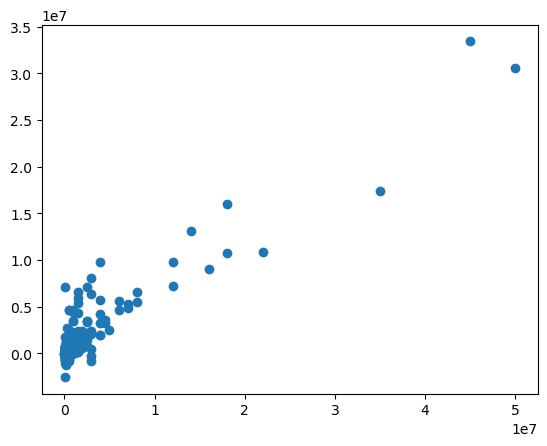

In [71]:
plt.scatter(Real_Values,predictions); 

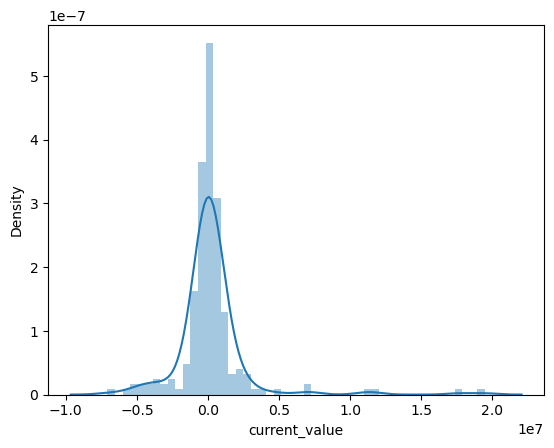

In [72]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution